# US Agricultural Trade Balance

Source: [USDA](https://www.ers.usda.gov/topics/international-markets-us-trade/us-agricultural-trade/outlook-for-us-agricultural-trade)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import afp_style as style
plt.style.use('https://storage.googleapis.com/datanode/afpchart.mplstyle')

In [7]:
## Source: https://www.ers.usda.gov/topics/international-markets-us-trade/us-agricultural-trade/outlook-for-us-agricultural-trade
df = pd.read_csv('data/CSVAgTradeBalance.csv')

In [8]:
df.head()

,Year,Measure Names,Exports,ExportsEstimates,ExportsForecast,Imports,ImportsEstimates,ImportsForecast
0,1990,Exports,45.3,45.3,NaN,NaN,NaN,NaN
1,1991,Exports,43.5,43.5,NaN,NaN,NaN,NaN
2,1992,Exports,47.2,47.2,NaN,NaN,NaN,NaN
3,1993,Exports,47.9,47.9,NaN,NaN,NaN,NaN
4,1994,Exports,49.5,49.5,NaN,NaN,NaN,NaN


In [ ]:
# Deduplicate 'Year' column, merge other columns
df.groupby('Year').first().reset_index()

,Year,Measure Names,Exports,ExportsEstimates,ExportsForecast,Imports,ImportsEstimates,ImportsForecast
0,1990,Exports,45.3,45.3,NaN,23.8,23.8,NaN
1,1991,Exports,43.5,43.5,NaN,23.8,23.8,NaN
2,1992,Exports,47.2,47.2,NaN,25.8,25.8,NaN
3,1993,Exports,47.9,47.9,NaN,25.9,25.9,NaN
4,1994,Exports,49.5,49.5,NaN,27.9,27.9,NaN
5,1995,Exports,61.0,61.0,NaN,30.5,30.5,NaN
6,1996,Exports,65.9,65.9,NaN,33.4,33.4,NaN
7,1997,Exports,63.1,63.1,NaN,37.2,37.2,NaN
8,1998,Exports,59.4,59.4,NaN,38.8,38.8,NaN
9,1999,Exports,53.8,53.8,NaN,39.7,39.7,NaN


In [ ]:
# Deduplicate 'Year' column, merge other columns
df = df.groupby('Year').first().reset_index()

/Users/cfaife/Documents/MATERIALS/Data/us_agriculture_exports/afp_style.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(t) for t in yticks])


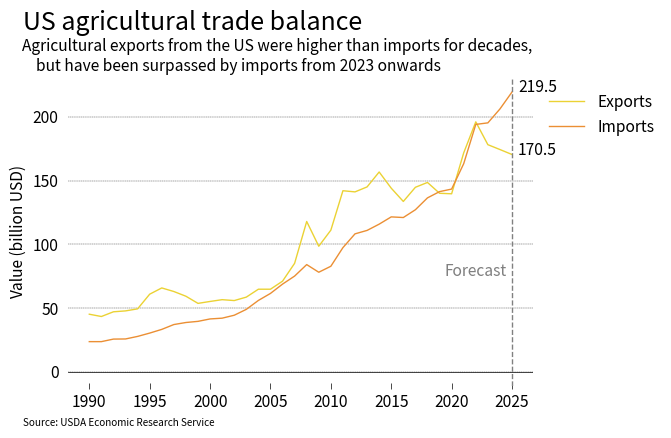

In [63]:
# Plot export and import values by year
######################################

fig, ax = plt.subplots()

df.plot(x='Year', 
        y=['Exports', 'Imports'], 
        kind='line', 
        ax=ax, 
        color=['#ebd234', '#eb8f34' ])

# Indicate forecast period
plt.axvline(x=2025, color='grey', linestyle='--')

# Add labels for 2025 forecast period
ax.text(2022, 75, 'Forecast', color='grey', ha='center')

# Display 2025 values for Export and Import
export2025 = df['Exports'].iloc[-1]
import2025 = df['Imports'].iloc[-1]

ax.text(2025.5, export2025, export2025, ha='left')
ax.text(2025.5, import2025, import2025, ha='left')

# Add y label
ax.set_ylabel('Value (billion USD)')

style.style_plot(plt,
    title='US agricultural trade balance',
    subtitle='''Agricultural exports from the US were higher than imports for decades,
    but have been surpassed by imports from 2023 onwards''',
    source='USDA Economic Research Service')

plt.savefig('US_agricultural_trade_balance.svg', dpi=300, bbox_inches='tight')

<Figure size 600x400 with 0 Axes>